In [1]:
import networkx as nx
import numpy as np

In [ ]:
def get_longest_path(G):
    """ Return all nodes involved in the longest path(s) in G.
    Only works for graphs where every node has out-degree of 1 (as in the state transition graph).
    """
    max_length = 0
    involved_nodes = []
    for node in G.nodes:
        successors = nx.dfs_successors(G, source = node, depth_limit=G.number_of_nodes())
        length = len(successors) + 1
        if length > max_length:
            max_length = length
            involved_nodes = set(successors.keys()).union({val for row in successors.values() for val in row})
        if length == max_length:
            involved_nodes = involved_nodes.union(set(successors.keys()).union({val for row in successors.values() for val in row}))
    
    return involved_nodes

def longest_path(G):
    """Find length of the longest path in G.
    Only works for graphs where every node has out-degree of 1 (as in the state transition graph).
    """
    involved_nodes = get_longest_path(G)
    G2 = G.subgraph(involved_nodes)
    try:
        cycle = nx.find_cycle(G2, orientation='original')
    except nx.exception.NetworkXNoCycle:
        return nx.dag_longest_path_length(G2)
    
    lengths = np.zeros(G2.number_of_nodes())
    for i, node in enumerate(G2.nodes):
        lengths[i] = len(nx.dfs_successors(G2, source = node, depth_limit=G2.number_of_nodes())) + 1
    return np.max(lengths)

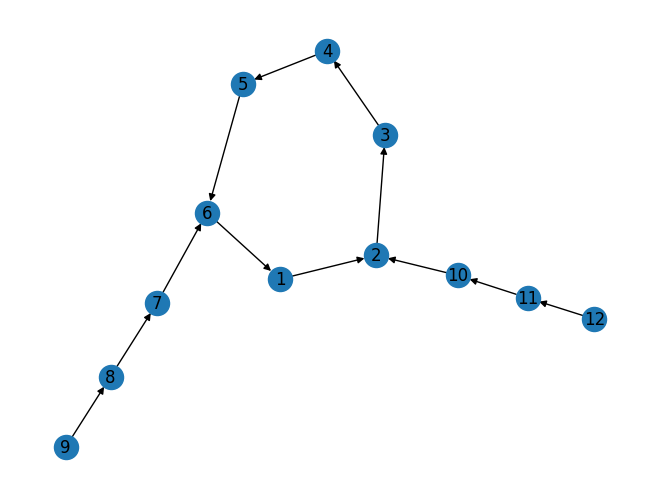

In [34]:
# make a big, complicated digraph where out-degree is always one, containing cycles
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (7, 6), (8, 7), (9, 8), (10, 2), (11, 10)])
G.add_edge(6,1)
G.add_edge(12, 11)

# plot
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True)

In [35]:
get_longest_path(G)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [25]:
for i in range(11):
    length = len(nx.dfs_successors(G, source = i+1, depth_limit=G.number_of_nodes()))
    print(i+1, length)
print(nx.dag_longest_path_length(G))

1 5
2 5
3 5
4 5
5 5
6 5
7 6
8 7
9 8
10 6
11 7


NetworkXUnfeasible: Graph contains a cycle or graph changed during iteration